In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
train_file = '/home/ryan/cs/datasets/mercedes/train.csv'
test_file = '/home/ryan/cs/datasets/mercedes/test.csv'
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [19]:
print str(np.sort(train_data['X107'].unique()).tolist())

[0]


In [10]:
train_data.shape

(4209, 378)

In [11]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [20]:
useless_columns = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
train_data = train_data.drop(useless_columns, axis=1)
test_data = test_data.drop(useless_columns, axis=1)
train_data = train_data[train_data.y <= 200]

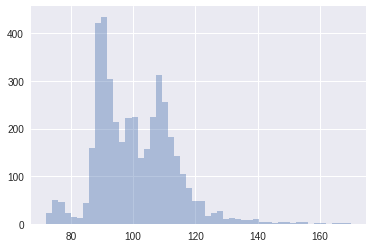

In [21]:
sns.distplot(train_data.y.values, bins=50, kde=False)
plt.show()

In [22]:
usable_columns = list(set(train_data.columns) - set(['ID', 'y']))

y_train = train_data['y'].values
id_test = test_data['ID'].values

X_train = train_data[usable_columns]
X_test = test_data[usable_columns]



In [24]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, x_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields X8, X2, X3, X0, X1, X6, X4, X5